# Outliers in Murder Accountability Project

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.preprocessing import minmax_scaling

from sklearn import preprocessing
from sklearn.metrics.pairwise import cosine_similarity

import pickle as pk

from jupyterthemes import jtplot
jtplot.style(figsize=(15, 9))

## Data

In [2]:
map_data = pd.read_csv('data/SHR65_22.csv', index_col=0)
map_data.head()

,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,Incident,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
ID,,,,,,,,,,,,,,,,,,,,,
197601001AKASP00,"Juneau, AK",AKASP00,Alaska,State Troopers,Primary state LE,FBI,Yes,1976,January,1,...,American Indian or Alaskan Native,Unknown or not reported,Knife or cutting instrument,Husband,Other arguments,NaN,0,0,30180.0,Rural Alaska
197601001AL00102,"Jefferson, AL",AL00102,Alabama,Birmingham,Municipal police,FBI,Yes,1976,January,1,...,Black,Unknown or not reported,Shotgun,Acquaintance,Felon killed by private citizen,Felon killed in commission of a crime,0,0,30180.0,"Birmingham-Hoover, AL"
197601001AL00104,"Jefferson, AL",AL00104,Alabama,Fairfield,Municipal police,FBI,Yes,1976,January,1,...,Black,Unknown or not reported,Shotgun,Wife,Other,NaN,0,0,30180.0,"Birmingham-Hoover, AL"
197601001AL00106,"Jefferson, AL",AL00106,Alabama,Leeds,Municipal police,FBI,Yes,1976,January,1,...,Black,Unknown or not reported,Knife or cutting instrument,Brother,Other arguments,NaN,0,0,30180.0,"Birmingham-Hoover, AL"
197601001AL00201,"Mobile, AL",AL00201,Alabama,Mobile,Municipal police,FBI,Yes,1976,January,1,...,White,Unknown or not reported,Strangulation - hanging,Acquaintance,Circumstances undetermined,NaN,0,0,30180.0,"Mobile, AL"


In [3]:
COLORS = {
    'Sex': ['pink', 'b', 'w'],
    'Solved': ['r', 'b'],
    'Source': ['g', 'b'],
}

## .75 Percentile

### By Year

In [123]:
by_year_75 = map_data.groupby('Year').count().quantile(q=.75)[0]
by_year_75

20863.0

In [124]:
by_year = map_data.groupby('Year').count()['CNTYFIPS'].to_frame()
all_cases_above_p75 = by_year[by_year['CNTYFIPS']>by_year_75].copy()
all_cases_above_p75.rename(columns={'CNTYFIPS': 'all_cases_above_p75'}, inplace=True)
all_cases_above_p75

,all_cases_above_p75
Year,
1979,21698
1980,23092
1981,21208
1990,21246
1991,22657
1992,23793
1993,24337
1994,23246
1995,21194


In [125]:
by_year['below_p75'] = by_year['CNTYFIPS']
by_year.loc[by_year['below_p75'] > by_year_75, 'below_p75'] = by_year_75

#### Solved by Year

In [23]:
solved_by_year_75 = map_data[map_data['Solved']=='Yes'].groupby('Year').count().quantile(q=.75)[0]
solved_by_year_75

14906.0

In [127]:
solved_by_year = map_data[map_data['Solved']=='Yes'].groupby('Year').count()['CNTYFIPS'].to_frame()
solved_cases_above_p75 = solved_by_year[solved_by_year['CNTYFIPS']>solved_by_year_75].copy()
solved_cases_above_p75.rename(columns={'CNTYFIPS': 'solved_cases_above_p75'}, inplace=True)
solved_cases_above_p75

,solved_cases_above_p75
Year,
1978,14992
1979,16029
1980,16729
1981,15788
1982,15060
1990,15001
1991,15321
1992,15881
1993,16436


In [128]:
solved_by_year['below_p75'] = solved_by_year['CNTYFIPS']
solved_by_year.loc[solved_by_year['below_p75'] > solved_by_year_75, 'below_p75'] = solved_by_year_75

#### Unsolved by Year

In [26]:
unsolved_by_year_75 = map_data[map_data['Solved']=='No'].groupby('Year').count().quantile(q=.75)[0]
unsolved_by_year_75

5938.5

In [129]:
unsolved_by_year = map_data[map_data['Solved']=='No'].groupby('Year').count()['CNTYFIPS'].to_frame()
unsolved_cases_above_p75 = unsolved_by_year[unsolved_by_year['CNTYFIPS']>unsolved_by_year_75].copy()
unsolved_cases_above_p75.rename(columns={'CNTYFIPS': 'unsolved_cases_above_p75'}, inplace=True)
unsolved_cases_above_p75

,unsolved_cases_above_p75
Year,
1980,6363
1990,6245
1991,7336
1992,7912
1993,7901
1994,7365
1995,6809
2016,6008
2017,5995


In [130]:
unsolved_by_year['below_p75'] = unsolved_by_year['CNTYFIPS']
unsolved_by_year.loc[unsolved_by_year['below_p75'] > unsolved_by_year_75, 'below_p75'] = unsolved_by_year_75

#### Visualizing

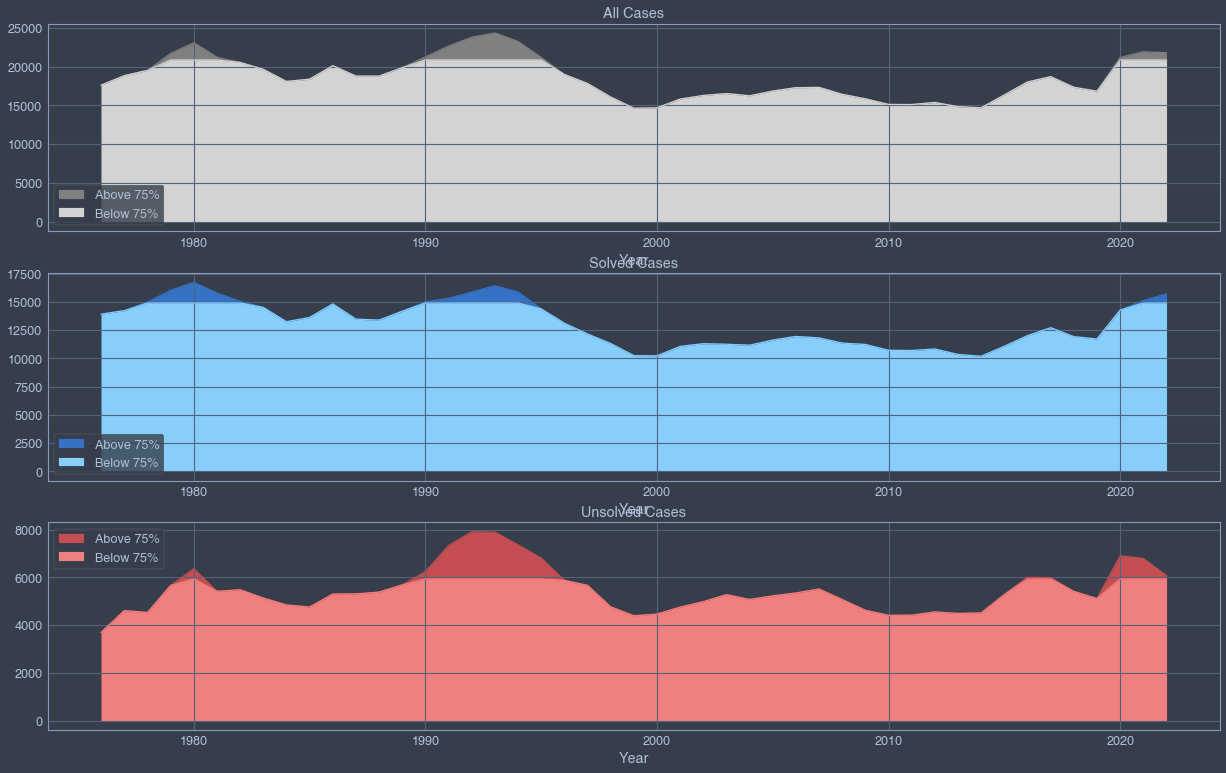

In [137]:
fig, ax = plt.subplots(3, 1, figsize=(21, 13))

by_year['CNTYFIPS'].plot(kind='area', ax=ax[0], color=['grey'], label='Above 75%')
by_year['below_p75'].plot(kind='area', ax=ax[0], color=['lightgrey'], label='Below 75%')
ax[0].set_title('All Cases')
ax[0].legend()

solved_by_year['CNTYFIPS'].plot(kind='area', ax=ax[1], color=['b'], label='Above 75%')
solved_by_year['below_p75'].plot(kind='area', ax=ax[1], color=['lightskyblue'], label='Below 75%')
ax[1].set_title('Solved Cases')
ax[1].legend()

unsolved_by_year['CNTYFIPS'].plot(kind='area', ax=ax[2], color=['r'], label='Above 75%')
unsolved_by_year['below_p75'].plot(kind='area', ax=ax[2], color=['lightcoral'], label='Below 75%')
ax[2].set_title('Unsolved Cases')
ax[2].legend()

#### Unsolved Cases with Female Victims

In [5]:
unsolved_female_by_year_75 = map_data[(map_data['Solved']=='No')
                                      & (map_data['VicSex']=='Female')].groupby('Year')\
                                                                       .count()\
                                                                       .quantile(q=.75)[0]
unsolved_female_by_year_75

1183.0

In [13]:
unsolved_female_by_year = map_data[(map_data['Solved']=='No')
                                   & (map_data['VicSex']=='Female')].groupby('Year')\
                                                                    .count()['CNTYFIPS'].to_frame()

unsolved_female_cases_above_p75 = unsolved_female_by_year[unsolved_female_by_year['CNTYFIPS']>unsolved_female_by_year_75].copy()
unsolved_female_cases_above_p75.rename(columns={'CNTYFIPS': 'unsolved_female_cases_above_p75'}, inplace=True)
unsolved_female_cases_above_p75

,unsolved_female_cases_above_p75
Year,
1979,1277
1980,1379
1982,1264
1986,1202
1987,1318
1988,1196
1989,1203
1991,1337
1992,1402


In [14]:
unsolved_female_by_year['below_p75'] = unsolved_female_by_year['CNTYFIPS']
unsolved_female_by_year.loc[unsolved_female_by_year['below_p75']
                            > unsolved_female_by_year_75, 'below_p75'] = unsolved_female_by_year_75

#### Unsolved Cases with Male Victims

In [16]:
unsolved_male_by_year_75 = map_data[(map_data['Solved']=='No')
                                    & (map_data['VicSex']=='Male')].groupby('Year')\
                                                                   .count()\
                                                                   .quantile(q=.75)[0]
unsolved_male_by_year_75

4892.5

In [17]:
unsolved_male_by_year = map_data[(map_data['Solved']=='No')
                                   & (map_data['VicSex']=='Male')].groupby('Year')\
                                                                  .count()['CNTYFIPS'].to_frame()

unsolved_male_cases_above_p75 = unsolved_male_by_year[unsolved_male_by_year['CNTYFIPS']>unsolved_male_by_year_75].copy()
unsolved_male_cases_above_p75.rename(columns={'CNTYFIPS': 'unsolved_male_cases_above_p75'}, inplace=True)
unsolved_male_cases_above_p75

,unsolved_male_cases_above_p75
Year,
1980,4967
1990,5092
1991,5971
1992,6489
1993,6509
1994,6117
1995,5488
2016,5296
2017,5266


In [18]:
unsolved_male_by_year['below_p75'] = unsolved_male_by_year['CNTYFIPS']
unsolved_male_by_year.loc[unsolved_male_by_year['below_p75']
                          > unsolved_male_by_year_75, 'below_p75'] = unsolved_male_by_year_75

#### Visualizing

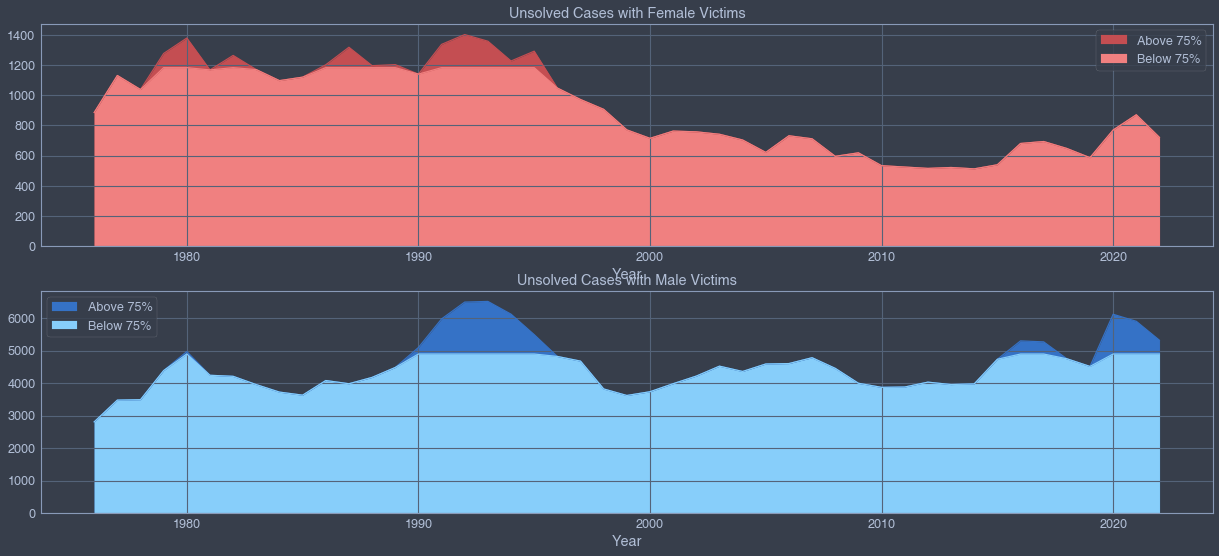

In [20]:
fig, ax = plt.subplots(2, 1, figsize=(21, 9))

unsolved_female_by_year['CNTYFIPS'].plot(kind='area', ax=ax[0], color=['r'], label='Above 75%')
unsolved_female_by_year['below_p75'].plot(kind='area', ax=ax[0], color=['lightcoral'], label='Below 75%')
ax[0].set_title('Unsolved Cases with Female Victims')
ax[0].legend()

unsolved_male_by_year['CNTYFIPS'].plot(kind='area', ax=ax[1], color=['b'], label='Above 75%')
unsolved_male_by_year['below_p75'].plot(kind='area', ax=ax[1], color=['lightskyblue'], label='Below 75%')
ax[1].set_title('Unsolved Cases with Male Victims')
ax[1].legend()

### By Year and State 

In [21]:
year_state = map_data[(map_data['Solved']=='No')
                     & (map_data['VicSex']=='Female')].groupby(['State', 'Year']).count()['CNTYFIPS'].to_frame()
year_state.head()

CNTYFIPS
State   Year          
Alabama 1976        14
        1977        21
        1978         8
        1979        17
        1980        20

In [22]:
year_state_75 = year_state.groupby(level=0).quantile(q=.75)['CNTYFIPS'].to_frame()
year_state_75

,CNTYFIPS
State,
Alabama,21.75
Alaska,4.00
Arizona,23.00
Arkansas,10.00
California,182.50
Colorado,14.50
Connecticut,9.00
Delaware,3.00
District of Columbia,18.50


In [23]:
year_state_pv = year_state.copy()
year_state_pv = pd.pivot_table(year_state_pv, index='Year', columns='State', values='CNTYFIPS')
year_state_pv.head()

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1976,14.0,1.0,12.0,1.0,150.0,13.0,5.0,4.0,13.0,34.0,...,NaN,18.0,44.0,4.0,1.0,14.0,10.0,3.0,15.0,NaN
1977,21.0,7.0,15.0,2.0,225.0,13.0,12.0,2.0,7.0,55.0,...,NaN,18.0,73.0,3.0,NaN,17.0,13.0,3.0,3.0,NaN
1978,8.0,NaN,17.0,7.0,172.0,15.0,8.0,1.0,8.0,65.0,...,NaN,10.0,70.0,3.0,NaN,18.0,18.0,4.0,5.0,NaN
1979,17.0,10.0,15.0,3.0,207.0,19.0,6.0,1.0,18.0,75.0,...,1.0,11.0,115.0,4.0,NaN,17.0,13.0,5.0,9.0,1.0
1980,20.0,3.0,23.0,13.0,260.0,22.0,9.0,1.0,20.0,118.0,...,NaN,12.0,97.0,6.0,NaN,17.0,18.0,2.0,14.0,1.0


In [24]:
year_state_vis = year_state_pv.copy()

In [25]:
year_state_vis = year_state_vis.loc[:, year_state_vis.columns.to_list()] > year_state_75['CNTYFIPS'].to_list()
year_state_vis = year_state_vis.astype(int)
year_state_vis.head()

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1976,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1977,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1978,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1979,0,1,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1980,0,0,0,1,1,1,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0


In [26]:
year_state_vis_pv = pd.pivot_table(year_state_vis.stack().to_frame(), index='State', columns='Year')
year_state_vis_pv.columns = year_state_vis_pv.columns.droplevel()
year_state_vis_pv.head()

Year,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,0,0,0,0
Alaska,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Arizona,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arkansas,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
California,0,1,0,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [27]:
flag = True
for state in year_state_vis_pv.index.to_list():
    for i in range(0, 40):
        if sum(year_state_vis_pv.loc[state].to_list()[i:i+7]) >= 7:
            if flag:
                print(state, year_state_vis_pv.columns[i])
                flag = False
                continue
            flag = True

Alabama 1991
Florida 1981
Illinois 1977
Michigan 1981
New York 1988
Texas 1985
Texas 1987


In [24]:
# Female and Male victims
# California 1990-1997
# District of Columbia 1987-1995
# New York 1987-1994
# Virginia 1990-1997

# Female victims only
# Alabama 1991-1997
# New York 1987-1995
# Texas 1985-1993

#### Visualization

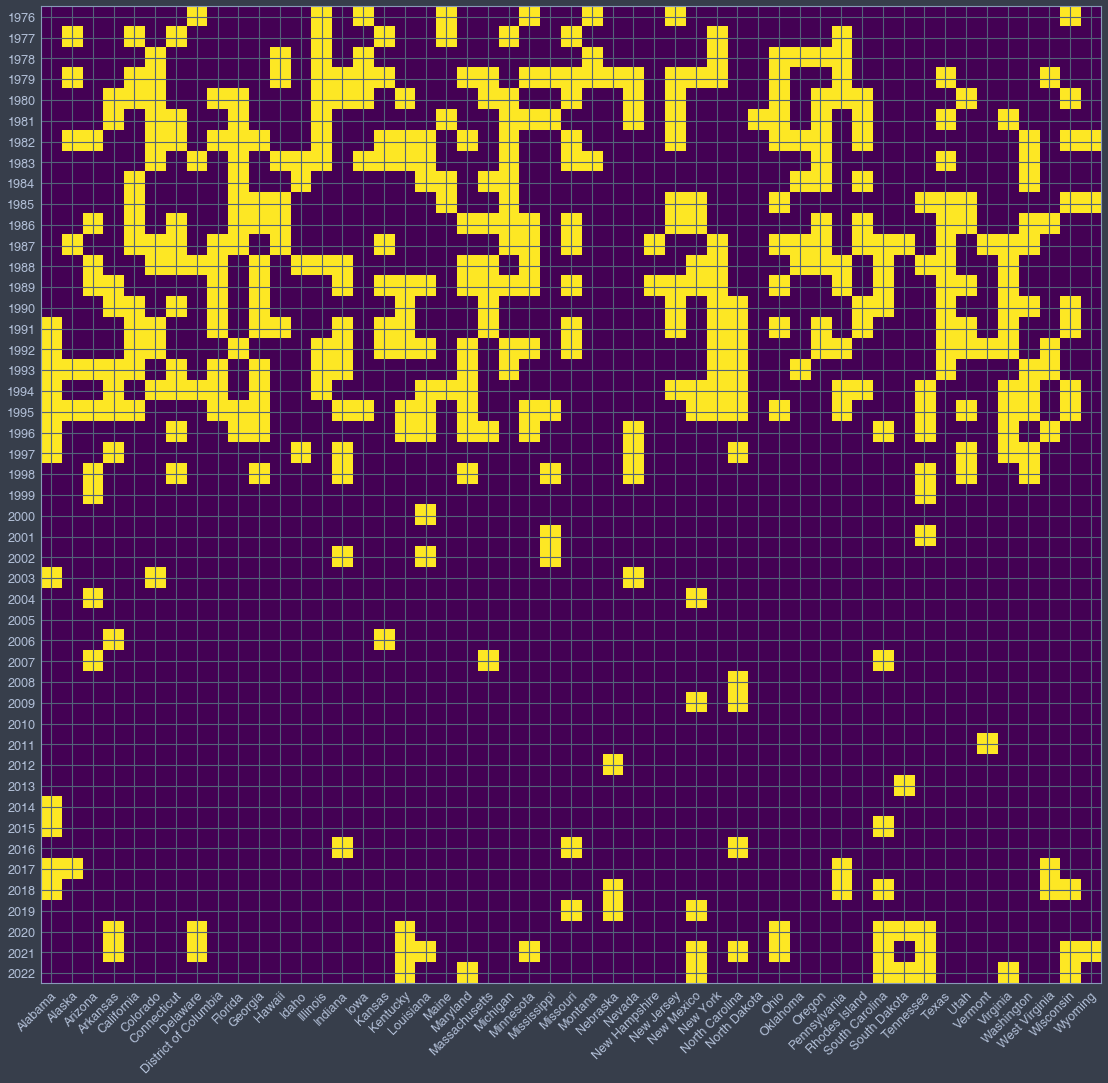

In [29]:
fig, ax = plt.subplots(figsize=(19, 19))
im = ax.imshow(year_state_vis)
ax.set_xticks(np.arange(len(year_state_vis.columns.to_list())))
ax.set_yticks(np.arange(len(year_state_vis.index.to_list())))
ax.set_xticklabels(year_state_vis.columns.to_list())
ax.set_yticklabels(year_state_vis.index.to_list())
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor");

## Weapons and Circumstance Pattern

In [5]:
weapon_circum = map_data[map_data['Solved']=='Yes'].groupby(['Weapon', 'Circumstance']).count()['CNTYFIPS'].to_frame()
weapon_circum = pd.pivot_table(weapon_circum, index='Weapon', columns='Circumstance', values='CNTYFIPS')
weapon_circum.fillna(0, inplace=True)

weapon_circum.head()

Circumstance,Abortion,All other manslaughter by negligence,All suspected felony type,Argument over money or property,Arson,Brawl due to influence of alcohol,Brawl due to influence of narcotics,Burglary,Child killed by babysitter,Children playing with gun,...,Other,Other - not specified,Other arguments,Other negligent handling of gun,Other sex offense,Prostitution and commercialized vice,Rape,Robbery,Sniper attack,Victim shot in hunting accident
Weapon,,,,,,,,,,,,,,,,,,,,,
Asphyxiation - includes death by gas,1.0,304.0,39.0,34.0,74.0,22.0,28.0,54.0,41.0,0.0,...,1565.0,203.0,639.0,0.0,28.0,8.0,102.0,219.0,0.0,0.0
"Blunt object - hammer, club, etc",0.0,151.0,249.0,779.0,37.0,767.0,167.0,477.0,132.0,0.0,...,4437.0,901.0,8709.0,5.0,137.0,23.0,334.0,3073.0,1.0,1.0
Drowning,0.0,248.0,16.0,8.0,0.0,10.0,2.0,6.0,9.0,0.0,...,582.0,68.0,114.0,1.0,7.0,3.0,17.0,27.0,1.0,0.0
Explosives,0.0,24.0,7.0,3.0,28.0,1.0,1.0,1.0,0.0,0.0,...,237.0,35.0,44.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0
Fire,0.0,291.0,37.0,30.0,2589.0,36.0,1.0,48.0,3.0,3.0,...,728.0,286.0,693.0,6.0,7.0,6.0,11.0,67.0,0.0,0.0


In [4]:
min_max_scaler = preprocessing.MinMaxScaler()
def make_it_min_max(df):
    min_max_ = pd.DataFrame(index=df.index, columns=df.columns)

    for i in range(len(df.index)):
        min_max_.iloc[i] = min_max_scaler.fit_transform(df.iloc[i].to_frame())[:, 0]
    
    return min_max_

In [6]:
min_max_w_c = make_it_min_max(weapon_circum)
min_max_w_c.head()

Circumstance,Abortion,All other manslaughter by negligence,All suspected felony type,Argument over money or property,Arson,Brawl due to influence of alcohol,Brawl due to influence of narcotics,Burglary,Child killed by babysitter,Children playing with gun,...,Other,Other - not specified,Other arguments,Other negligent handling of gun,Other sex offense,Prostitution and commercialized vice,Rape,Robbery,Sniper attack,Victim shot in hunting accident
Weapon,,,,,,,,,,,,,,,,,,,,,
Asphyxiation - includes death by gas,0.000639,0.194249,0.02492,0.021725,0.047284,0.014058,0.017891,0.034505,0.026198,0.0,...,1.0,0.129712,0.408307,0.0,0.017891,0.005112,0.065176,0.139936,0.0,0.0
"Blunt object - hammer, club, etc",0.0,0.017338,0.028591,0.089448,0.004248,0.08807,0.019176,0.054771,0.015157,0.0,...,0.509473,0.103456,1.0,0.000574,0.015731,0.002641,0.038351,0.352853,0.000115,0.000115
Drowning,0.0,0.426117,0.027491,0.013746,0.0,0.017182,0.003436,0.010309,0.015464,0.0,...,1.0,0.116838,0.195876,0.001718,0.012027,0.005155,0.02921,0.046392,0.001718,0.0
Explosives,0.0,0.101266,0.029536,0.012658,0.118143,0.004219,0.004219,0.004219,0.0,0.0,...,1.0,0.147679,0.185654,0.0,0.004219,0.0,0.0,0.021097,0.0,0.0
Fire,0.0,0.112399,0.014291,0.011587,1.0,0.013905,0.000386,0.01854,0.001159,0.001159,...,0.28119,0.110467,0.267671,0.002317,0.002704,0.002317,0.004249,0.025879,0.0,0.0


In [4]:
weapons_list = map_data['Weapon'].unique()
circumstance_list = map_data['Circumstance'].unique()
years_list = map_data['Year'].unique()
states = map_data['State'].unique()

data_solved = map_data[(map_data['Solved']=='Yes') & (map_data['VicSex']=='Female')]
data_unsolved = map_data[(map_data['Solved']=='No') & (map_data['VicSex']=='Female')]

w = data_solved\
    .groupby(['State',
              'Year',
              'Weapon',
              'Circumstance'])\
    .count()['CNTYFIPS']\
    .to_frame()

uw = data_unsolved\
     .groupby(['State',
              'Year',
              'Weapon',
              'Circumstance'])\
     .count()['CNTYFIPS']\
     .to_frame()

def get_cosine_similarity_circumstances(weapon):
    full_cosine = pd.DataFrame(index=years_list)
    for state in states:
        if weapon not in data_solved[data_solved['State']==state]['Weapon'].unique()\
        or weapon not in data_unsolved[data_unsolved['State']==state]['Weapon'].unique():
            continue
            
        temp = pd.DataFrame(index=years_list, columns=circumstance_list, data=0)
        pivot_w = pd.pivot_table(w.loc[state, :, weapon],
                                 index='Year',
                                 columns=['Circumstance'],
                                 values='CNTYFIPS')
        pivot_w = pivot_w + temp
        pivot_w.fillna(0, inplace=True)
        
        pivot_uw = pd.pivot_table(uw.loc[state, :, weapon],
                                  index='Year',
                                  columns=['Circumstance'],
                                  values='CNTYFIPS')
        pivot_uw = pivot_uw + temp
        pivot_uw.fillna(0, inplace=True)
        
        r = cosine_similarity(pivot_w.to_numpy(), pivot_uw.to_numpy())
        res = pd.DataFrame(index=years_list, columns=years_list, data=r)
        
        full_cosine[state] = np.diag(res)
    
    return full_cosine


# def cosine_similarity_by_circumstance(weapons):
#     weapon_pack = {}
#     if weapons == 'all':
#         for weapon in weapons_list:
#             weapon_pack[weapon] = get_cosine_similarity_circumstances(weapon)
#     else:
#         for weapon in weapons:
#             weapon_pack[weapon] = get_cosine_similarity_circumstances(weapon)
            
#     return weapon_pack


In [21]:
weapons_df = {}
for weapon in weapons_list:
    weapons_df[weapon] = get_cosine_similarity_circumstances(weapon)

In [22]:
with open('data/weapons_female_victims_df.pickle', 'wb') as f:
    pk.dump(weapons_df, f, pk.HIGHEST_PROTOCOL)

In [5]:
with open('data/weapons_female_victims_df.pickle', 'rb') as f:
    weapons_df = pk.load(f)

In [9]:
cs = get_cosine_similarity_circumstances('Handgun - pistol, revolver, etc')

In [20]:
weapons_solved = map_data[map_data['Solved']=='Yes'].groupby('Weapon').count().sort_values(by='Ori', ascending=False)['Ori']
weapons_unsolved = map_data[map_data['Solved']=='No'].groupby('Weapon').count().sort_values(by='Ori', ascending=False)['Ori']

In [45]:
weapons_popularity = pd.DataFrame(index=weapons_solved.index, columns=['Solved', 'Unsolved'], data=0)
weapons_popularity['Solved'] = weapons_solved
weapons_popularity['Unsolved'] = weapons_unsolved
weapons_popularity

,Solved,Unsolved
Weapon,,
"Handgun - pistol, revolver, etc",289898,130956
Knife or cutting instrument,97635,25447
"Firearm, type not stated",46569,40264
"Personal weapons, includes beating",40411,8126
Shotgun,33911,5801
Other or type unknown,29277,18876
Rifle,27021,4805
"Blunt object - hammer, club, etc",25797,11082
Strangulation - hanging,5560,4587


In [17]:
cs.loc[1976]['Alabama']

0.32778621184407364

In [35]:
cs[cs['California']<0.35].index

Int64Index([1977], dtype='int64')

In [40]:
cs.loc[cs[cs['Alaska']<0.35].index]['Alaska']

1977    0.291043
1978    0.247016
1979    0.230269
1980    0.000000
1981    0.199007
1982    0.097129
1983    0.081111
1984    0.203069
1987    0.196116
1988    0.134840
1989    0.188982
1990    0.000000
1991    0.301511
1995    0.304997
1996    0.299078
1997    0.164399
1998    0.000000
1999    0.288675
2001    0.301511
2003    0.000000
2004    0.188982
2007    0.000000
2008    0.000000
2009    0.000000
2010    0.000000
2011    0.000000
2012    0.000000
2013    0.000000
2014    0.000000
2015    0.000000
2016    0.000000
2017    0.000000
2018    0.000000
2019    0.316228
2020    0.000000
2021    0.000000
2022    0.000000
Name: Alaska, dtype: float64

In [44]:
cs[cs<0.35]

,Alaska,Alabama,Arkansas,Arizona,California,Colorado,Connecticut,District of Columbia,Delaware,Florida,...,Texas,Virginia,Washington,Wisconsin,West Virginia,Wyoming,Montana,South Dakota,Utah,Vermont
1976,NaN,0.327786,0.264491,0.144652,NaN,NaN,0.179896,NaN,0.000000,0.342831,...,NaN,NaN,NaN,0.169810,0.000000,0.000000,0.000000,0.0,0.105409,0.0
1977,0.291043,0.179049,0.065458,0.088098,0.287503,0.267067,0.220416,NaN,0.000000,0.195974,...,NaN,0.117972,0.149174,0.237851,0.000000,0.000000,NaN,0.0,NaN,0.0
1978,0.247016,0.184668,0.057632,NaN,NaN,0.148083,NaN,NaN,0.000000,0.206162,...,NaN,0.157685,0.197386,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.0
1979,0.230269,0.116434,0.142460,NaN,NaN,0.344896,NaN,NaN,0.000000,0.279166,...,NaN,0.191484,NaN,0.229416,0.051299,NaN,0.000000,0.0,NaN,0.0
1980,0.000000,0.094372,0.246239,NaN,NaN,0.221648,0.154196,NaN,0.000000,NaN,...,NaN,0.126488,NaN,NaN,0.076713,0.162221,0.000000,0.0,0.000000,0.0
1981,0.199007,0.087570,0.073513,NaN,NaN,NaN,0.248654,0.330398,0.000000,0.321786,...,NaN,0.169712,0.345115,NaN,0.011213,0.000000,0.000000,0.0,NaN,0.0
1982,0.097129,0.180444,NaN,0.220547,NaN,0.224468,0.178078,NaN,0.125000,0.198212,...,NaN,0.292348,0.195760,NaN,NaN,0.138675,0.000000,NaN,0.323498,0.0
1983,0.081111,0.117398,0.298829,0.168044,NaN,0.271862,NaN,NaN,0.000000,0.300363,...,NaN,0.164265,NaN,NaN,NaN,0.000000,0.000000,NaN,0.118678,0.0
1984,0.203069,0.269086,0.183664,0.300399,NaN,0.095507,0.094573,NaN,0.000000,NaN,...,NaN,0.199162,NaN,NaN,0.212298,0.000000,0.158114,0.0,0.226134,0.0
1985,NaN,0.305182,0.217479,NaN,NaN,0.290563,0.109797,NaN,0.000000,NaN,...,NaN,0.097132,NaN,NaN,0.000000,0.000000,0.000000,0.0,NaN,0.0


<AxesSubplot:>

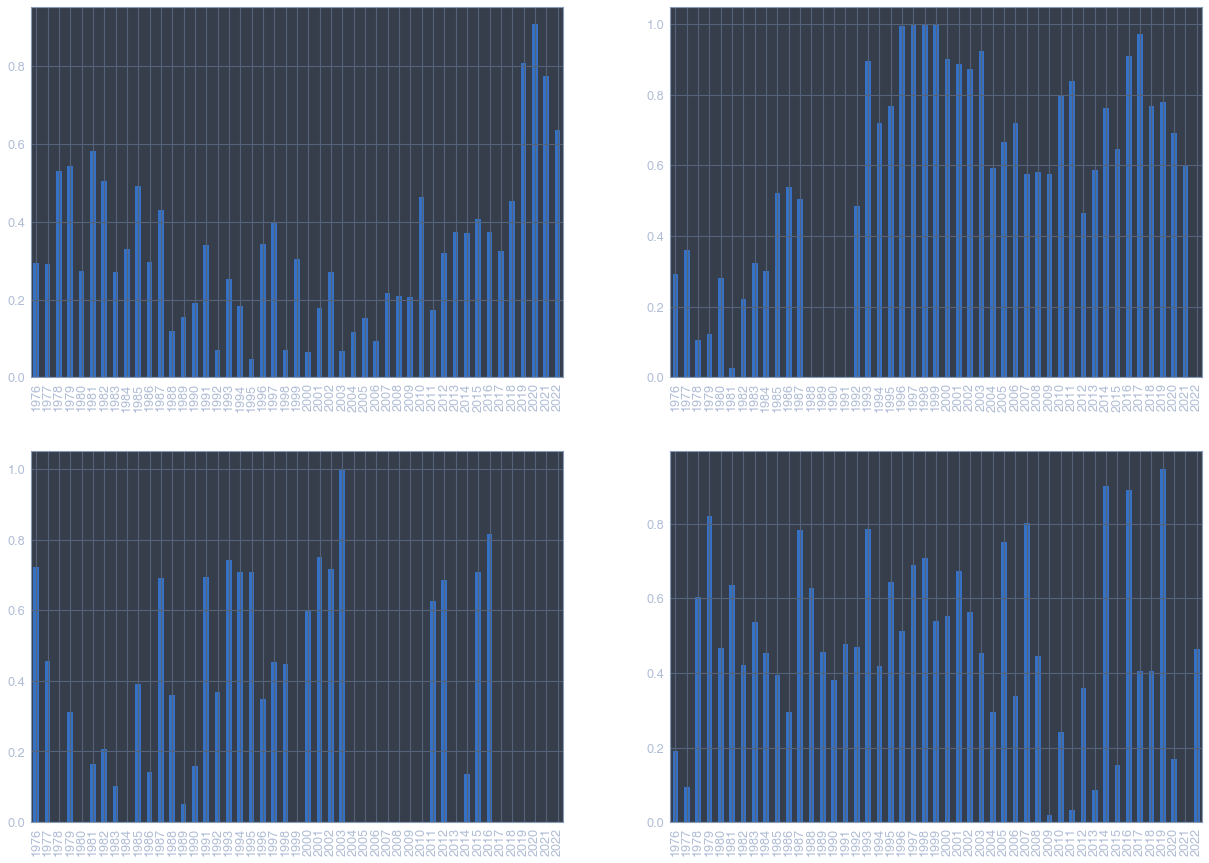

In [25]:
fig, ax = plt.subplots(2, 2, figsize=(21, 15))

weapons_df['Knife or cutting instrument']['California'].plot(kind='bar', ax=ax[0, 0])
weapons_df['Knife or cutting instrument']['Florida'].plot(kind='bar', ax=ax[0, 1])
weapons_df['Knife or cutting instrument']['Alabama'].plot(kind='bar', ax=ax[1, 0])
weapons_df['Knife or cutting instrument']['New York'].plot(kind='bar', ax=ax[1, 1])

In [7]:
weapons_df.keys()

dict_keys(['Knife or cutting instrument', 'Shotgun', 'Strangulation - hanging', 'Rifle', 'Handgun - pistol, revolver, etc', 'Personal weapons, includes beating', 'Fire', 'Other or type unknown', 'Firearm, type not stated', 'Asphyxiation - includes death by gas', 'Narcotics or drugs, sleeping pills', 'Blunt object - hammer, club, etc', 'Drowning', 'Pushed or thrown out window', 'Other gun', 'Poison - does not include gas', 'Explosives', 'Weapon Not Reported'])

In [9]:
wpn = 'Knife or cutting instrument'
threshold = 0.35

In [14]:
wpn_1 = weapons_df[wpn][weapons_df[wpn]<threshold]

In [239]:
x = np.repeat(np.arange(1, wpn_1.columns.shape[0]+1), 47)#.reshape(51, 47)
y = (wpn_1.notnull().to_numpy().astype(int).T * np.tile(np.arange(1, wpn_1.index.shape[0]+1), (wpn_1.columns.shape[0], 1))).flatten()

x = x[y!=0]
y = y[y!=0]

In [126]:
wpn_1.notnull()

,Alaska,Alabama,Arkansas,Arizona,California,Colorado,Connecticut,District of Columbia,Delaware,Florida,...,Texas,Virginia,Washington,Wisconsin,West Virginia,Wyoming,Montana,South Dakota,Utah,Vermont
1976,True,False,True,True,True,False,True,True,True,True,...,False,True,True,True,True,True,False,True,True,True
1977,True,False,True,True,True,True,True,True,True,False,...,False,True,True,True,True,True,True,True,True,True
1978,True,True,False,True,False,True,True,True,True,True,...,False,True,True,True,False,True,True,True,True,True
1979,True,True,True,True,False,True,True,True,True,True,...,False,True,True,False,True,True,True,True,True,True
1980,True,True,True,True,True,True,True,False,True,True,...,False,True,True,True,True,True,True,True,True,True
1981,True,True,True,True,False,True,True,False,True,True,...,False,True,False,False,False,True,True,True,True,True
1982,True,True,True,True,False,True,True,True,True,True,...,True,True,False,True,True,True,True,True,True,True
1983,True,True,True,True,True,True,True,True,True,True,...,False,False,True,True,True,True,True,True,False,True
1984,True,True,False,False,True,True,True,False,True,True,...,False,True,True,True,True,True,True,True,True,True
1985,True,False,True,True,False,True,False,False,True,False,...,True,False,False,True,True,True,True,True,True,True


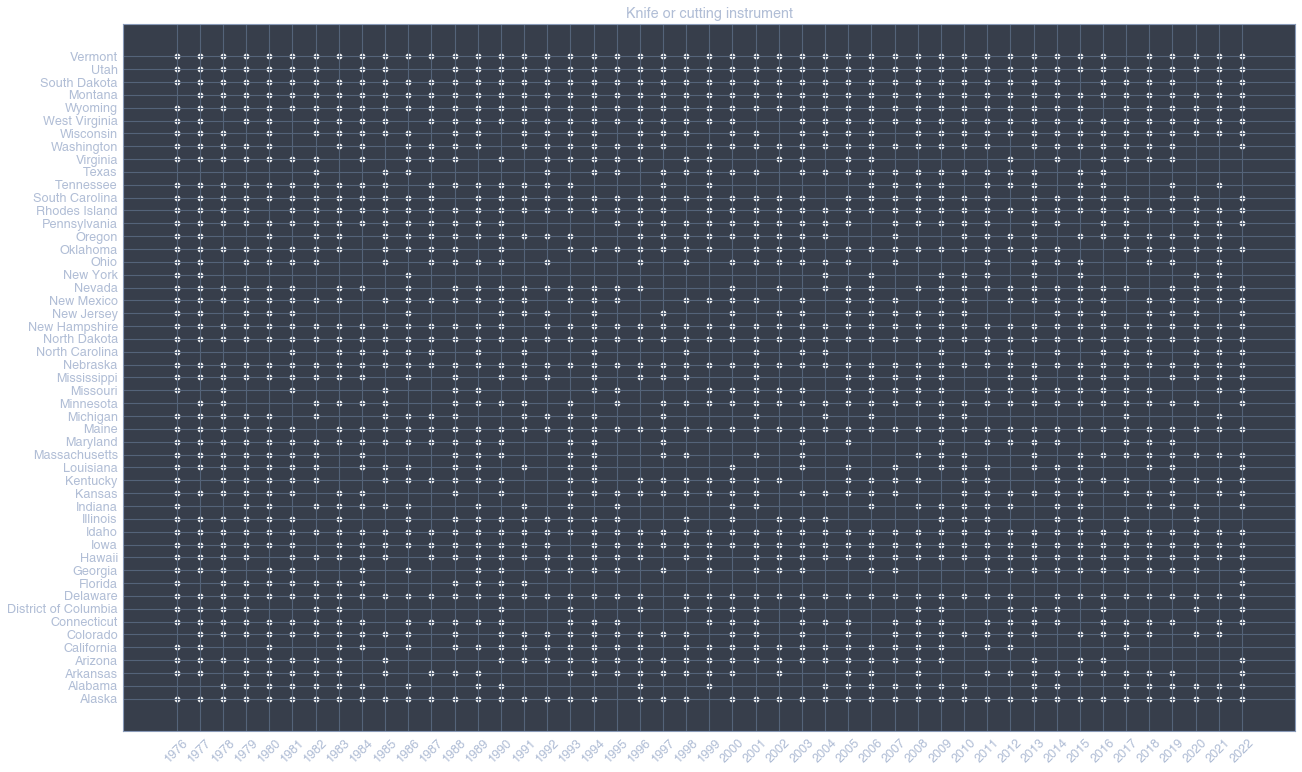

In [256]:
fig, ax = plt.subplots(1, figsize=(21, 13))
ax.scatter(y, x, color='w')
ax.set_yticks(np.arange(1, 52))
ax.set_xticks(np.arange(1, 48))
ax.set_xticklabels(np.arange(1976, 2023), rotation=45)
ax.set_yticklabels(list(map_data['State'].unique()))
ax.set_title(wpn);

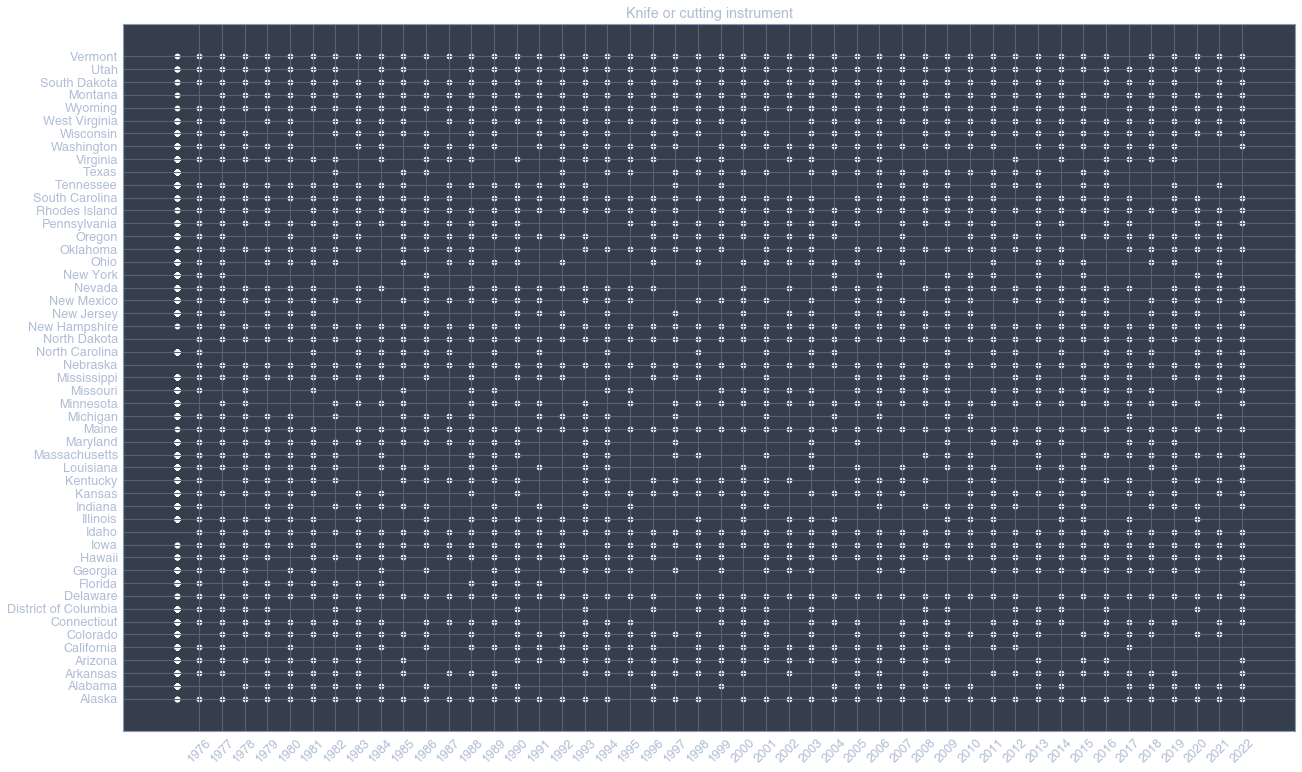

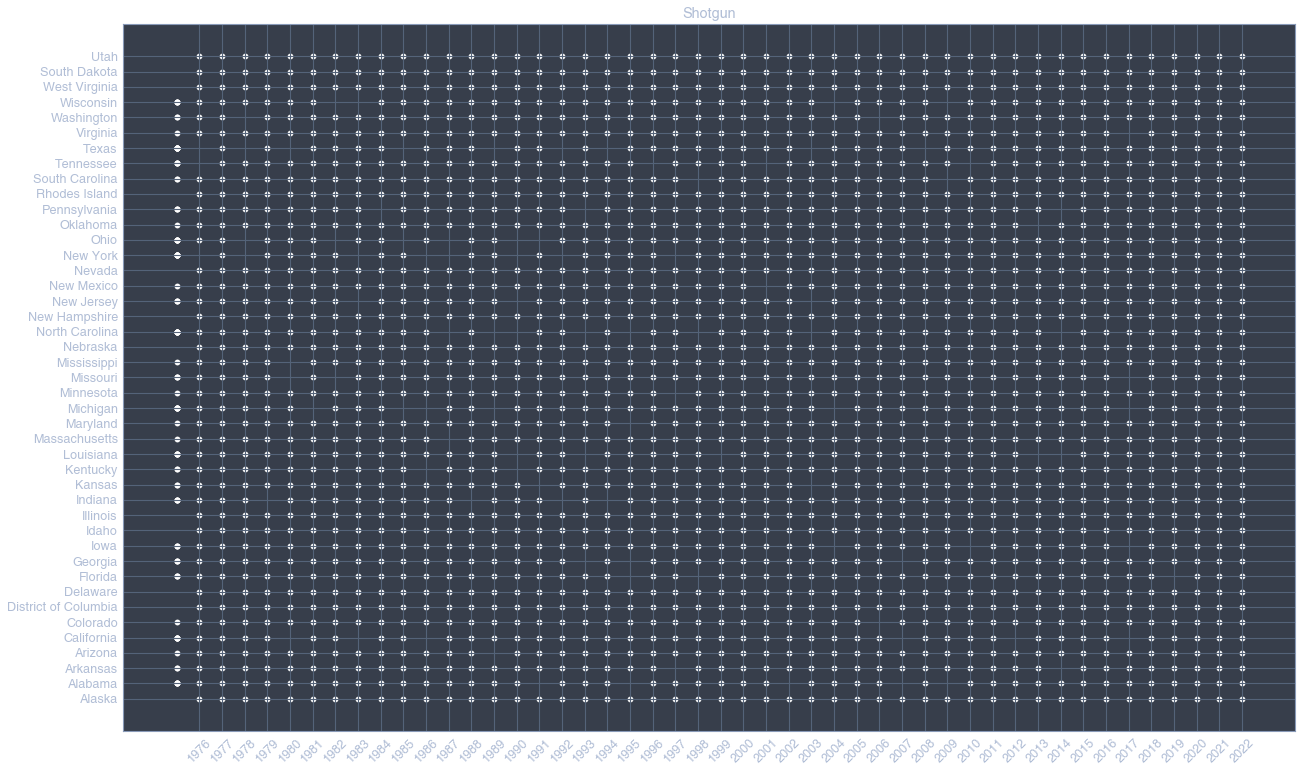

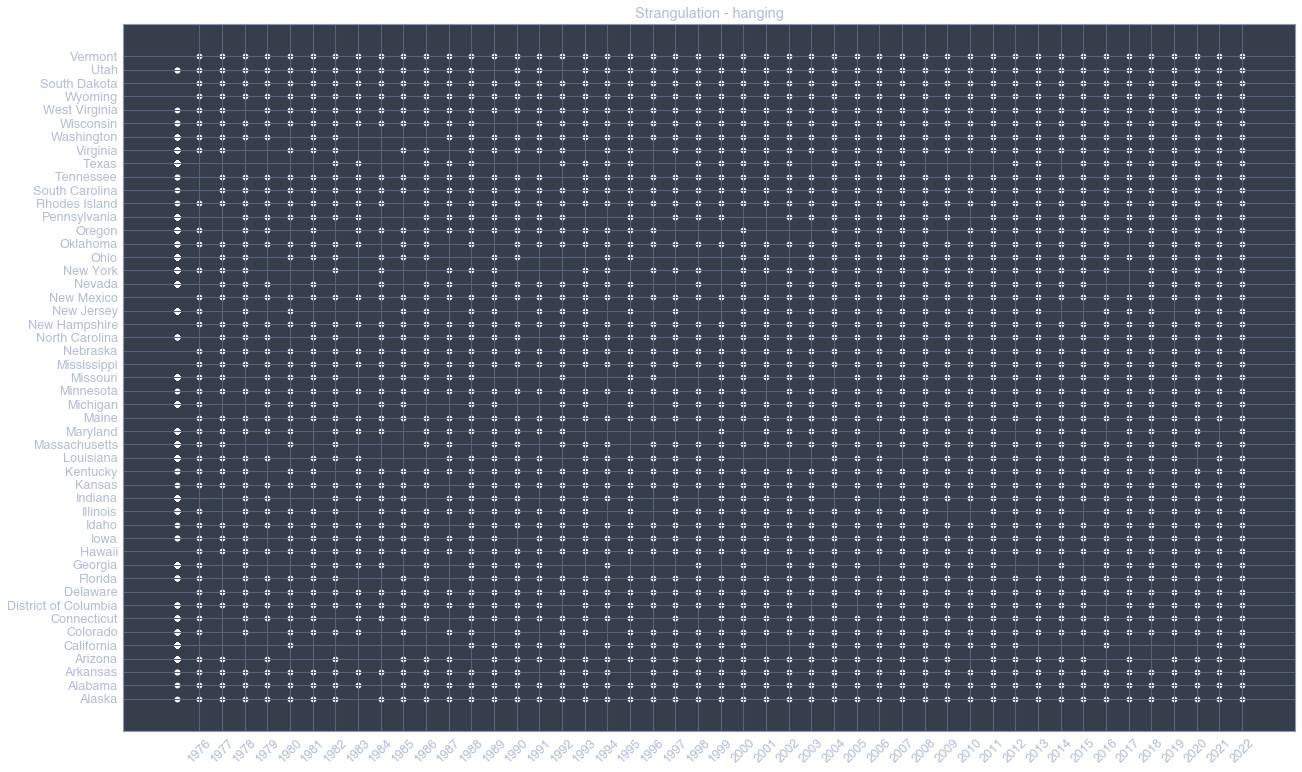

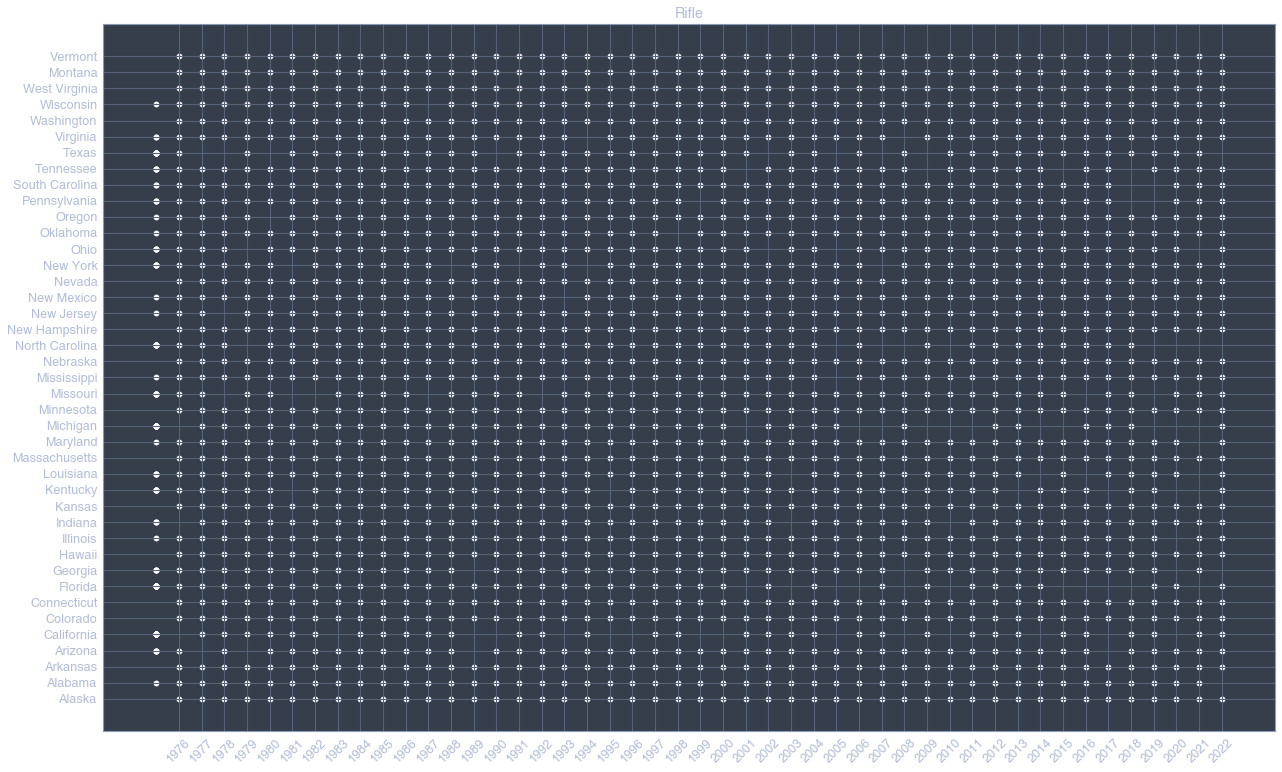

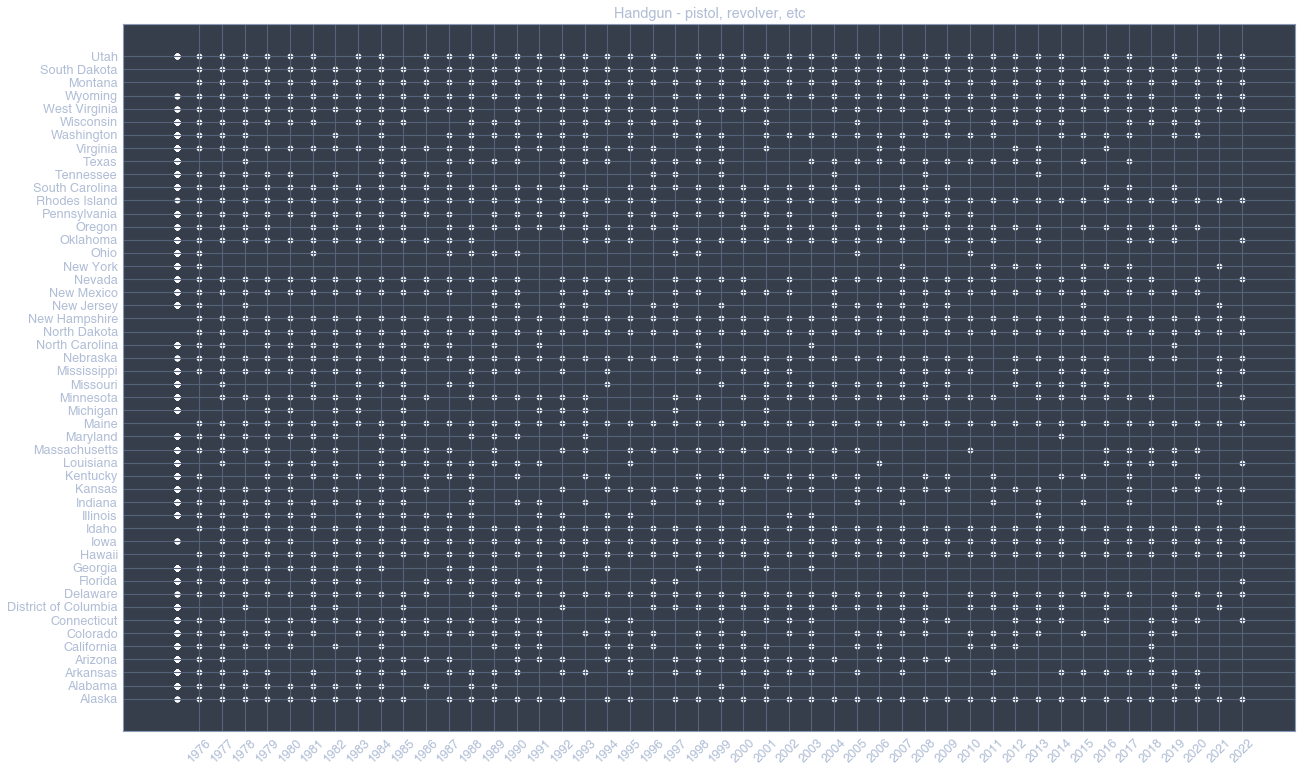

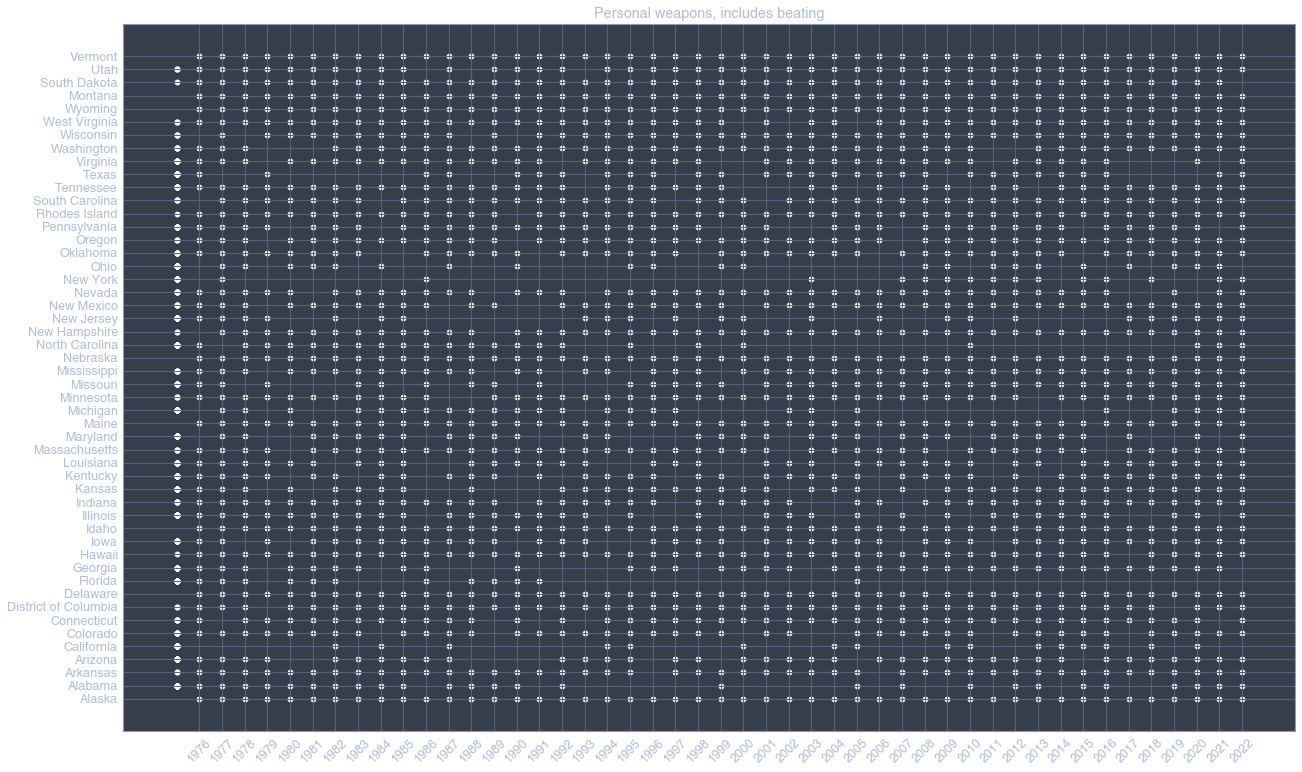

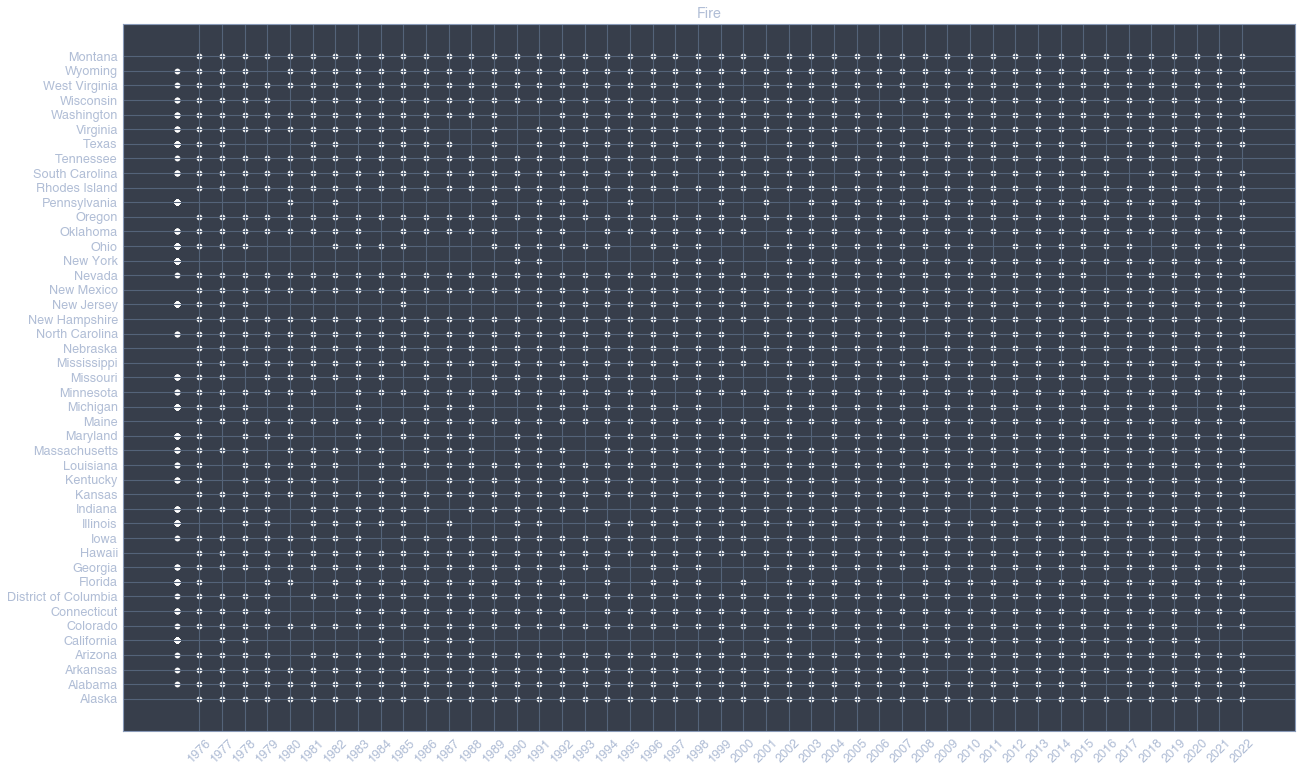

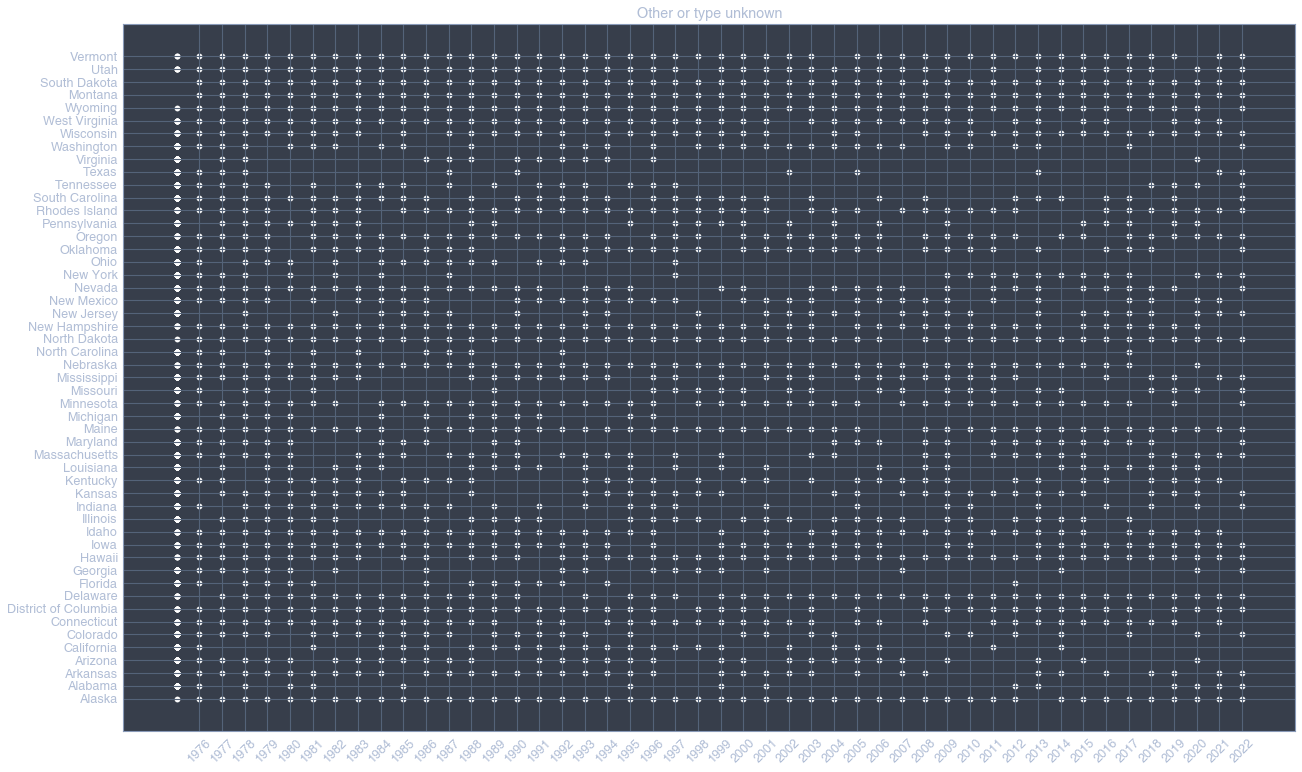

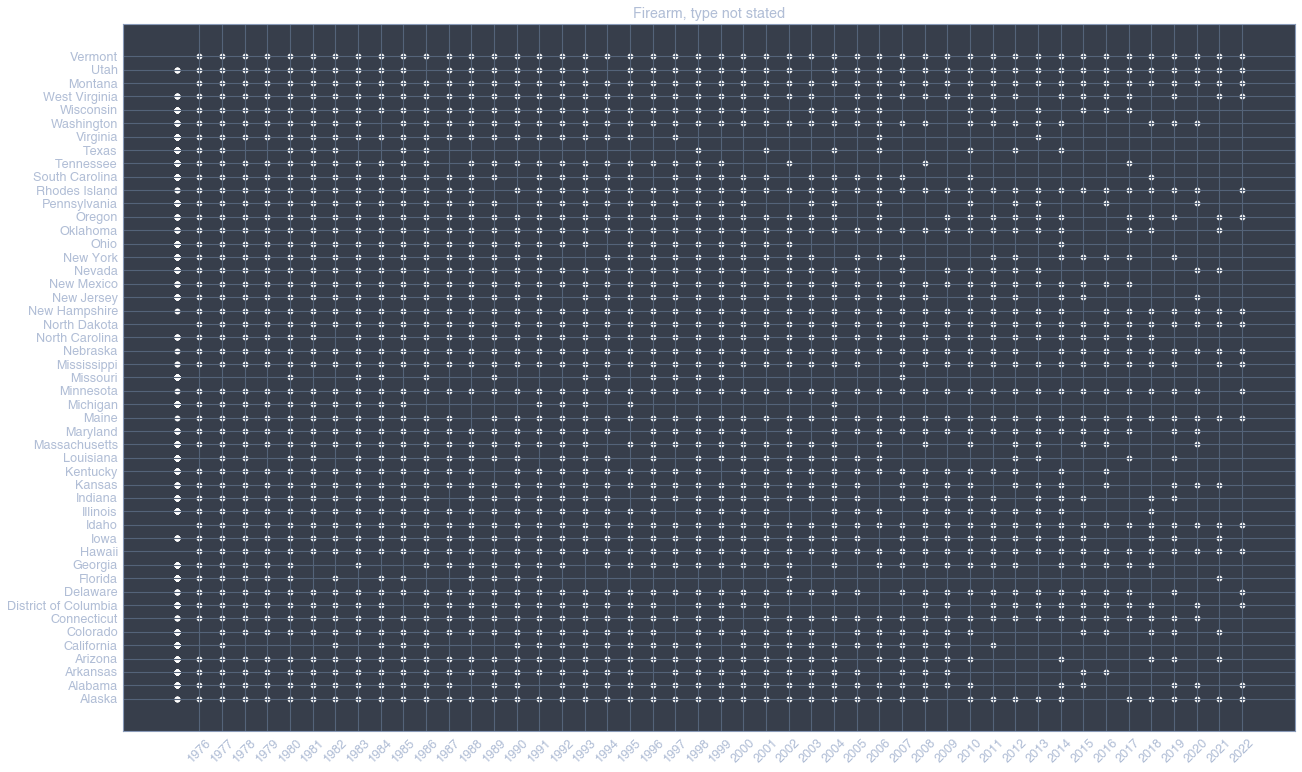

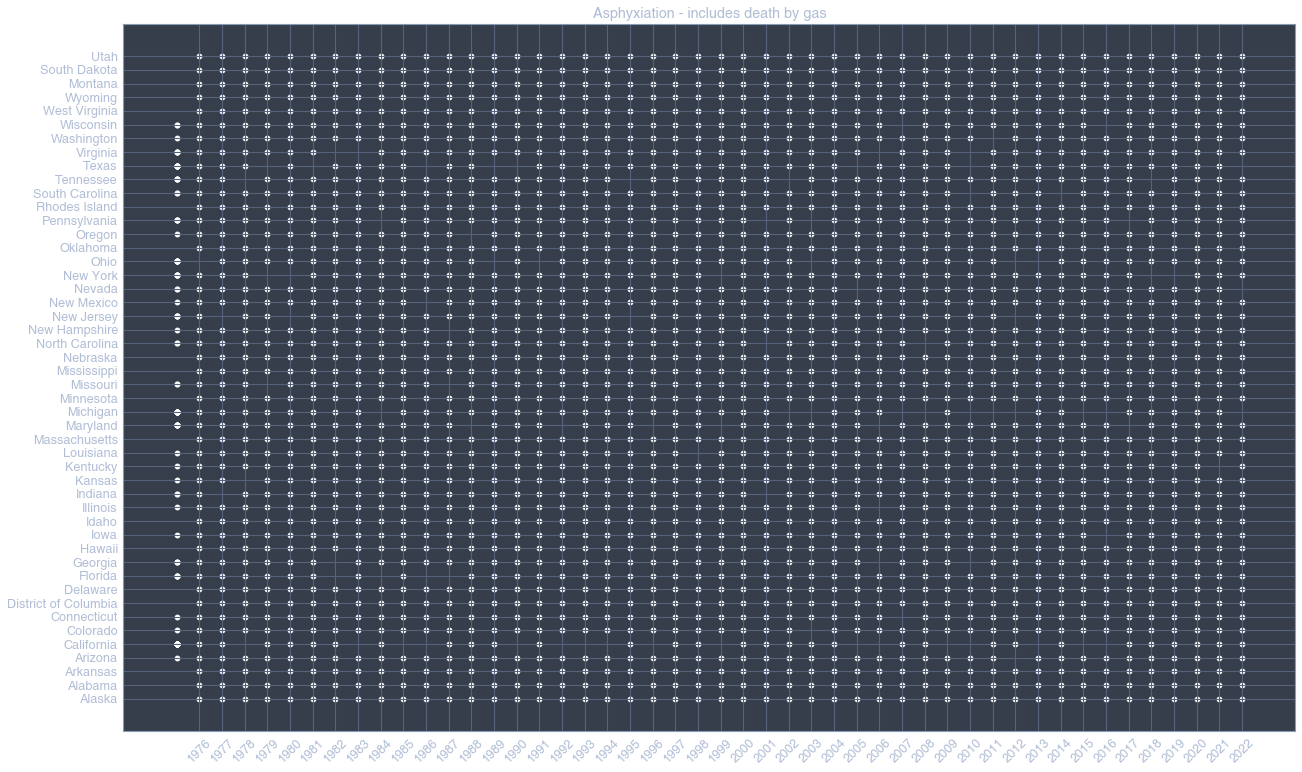

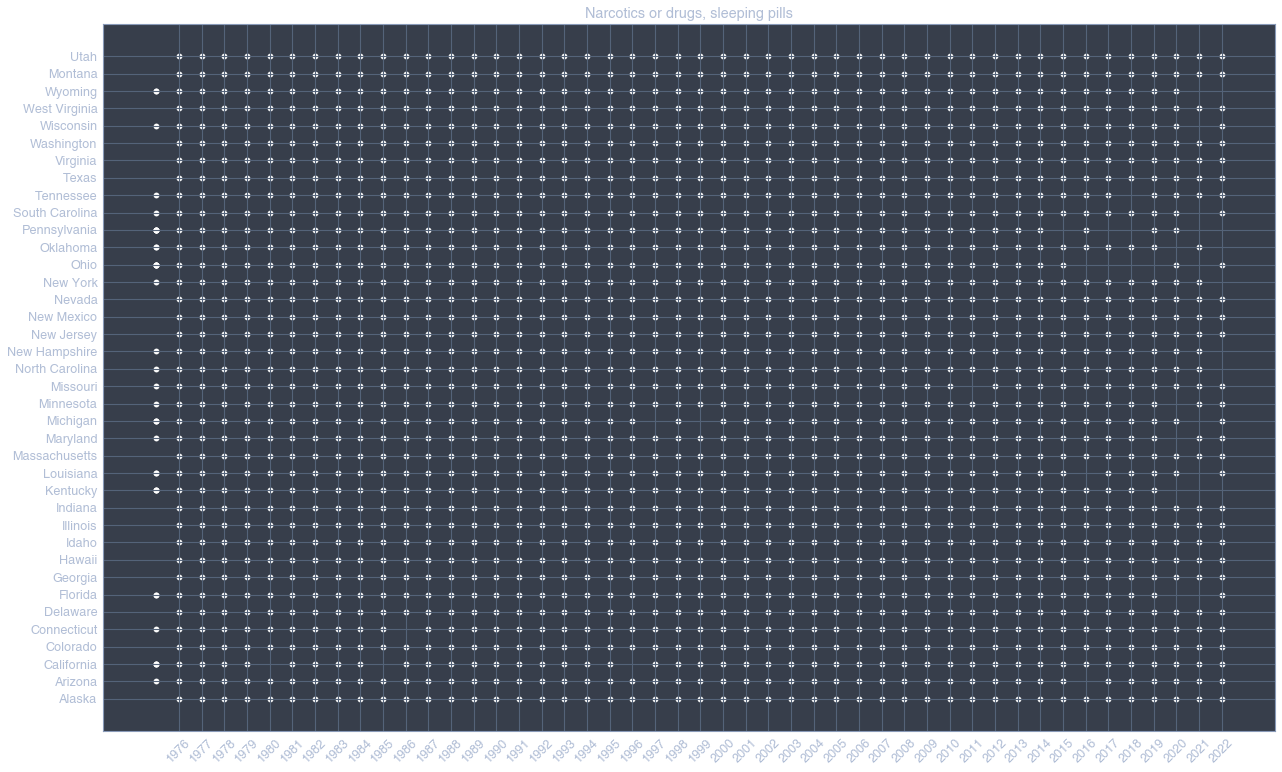

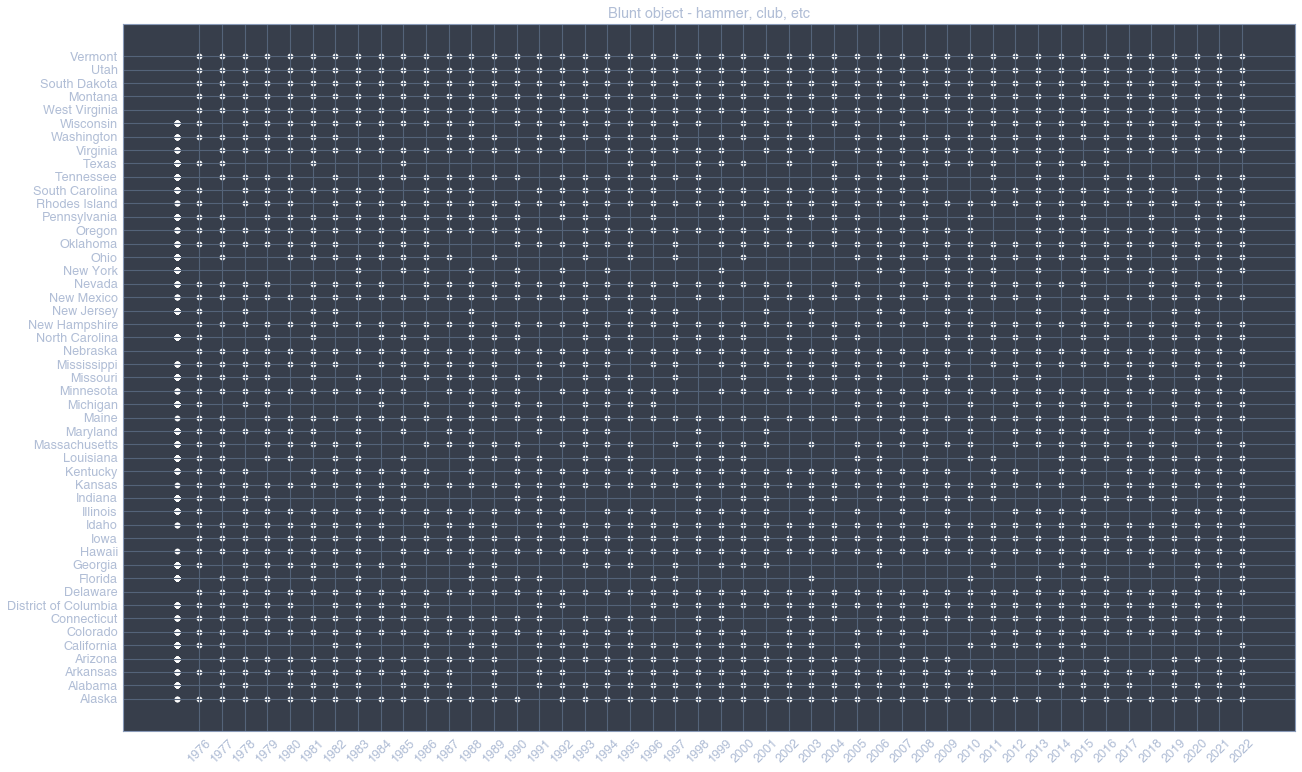

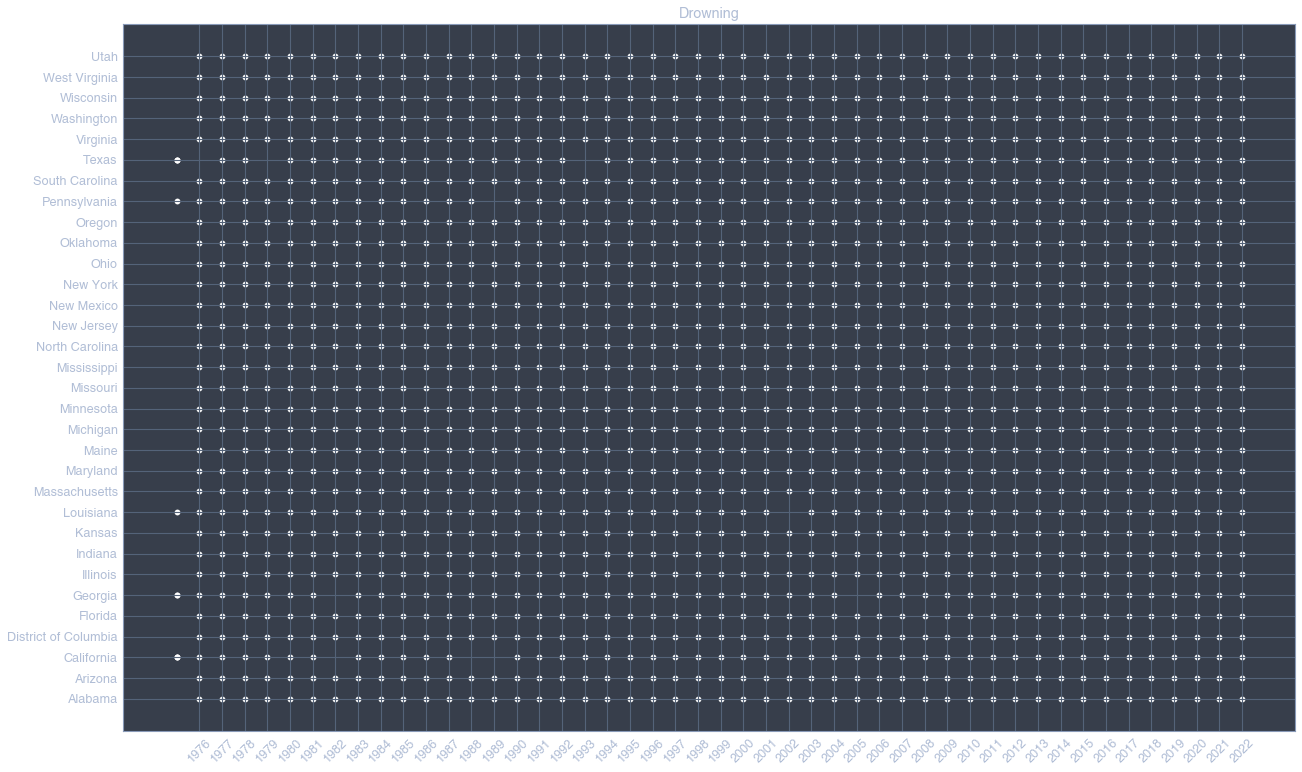

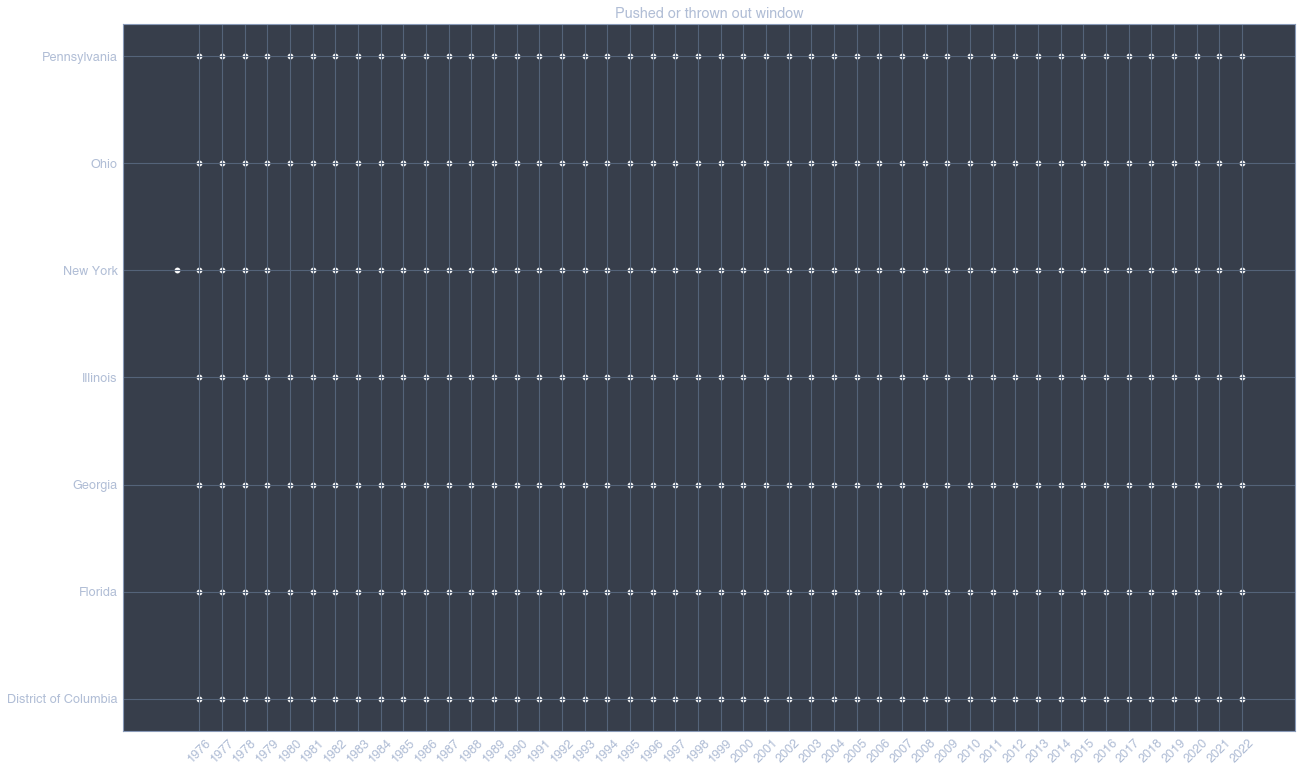

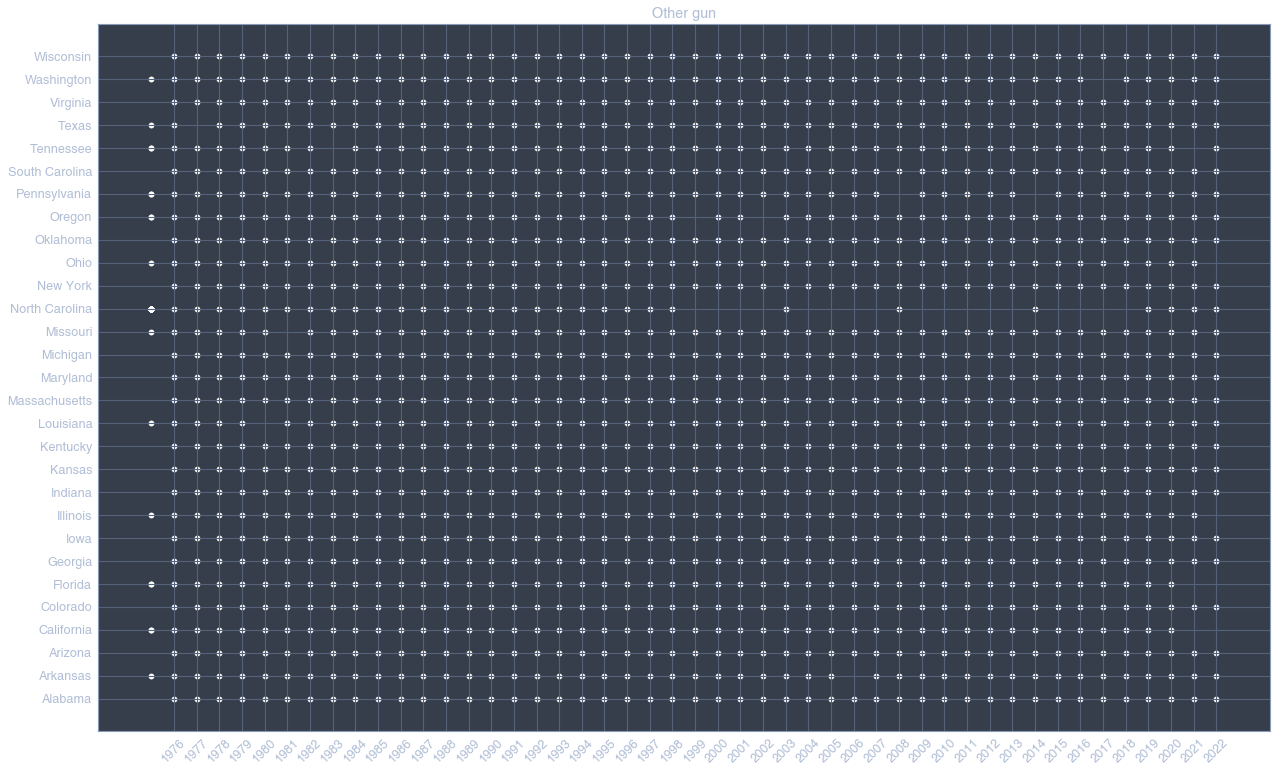

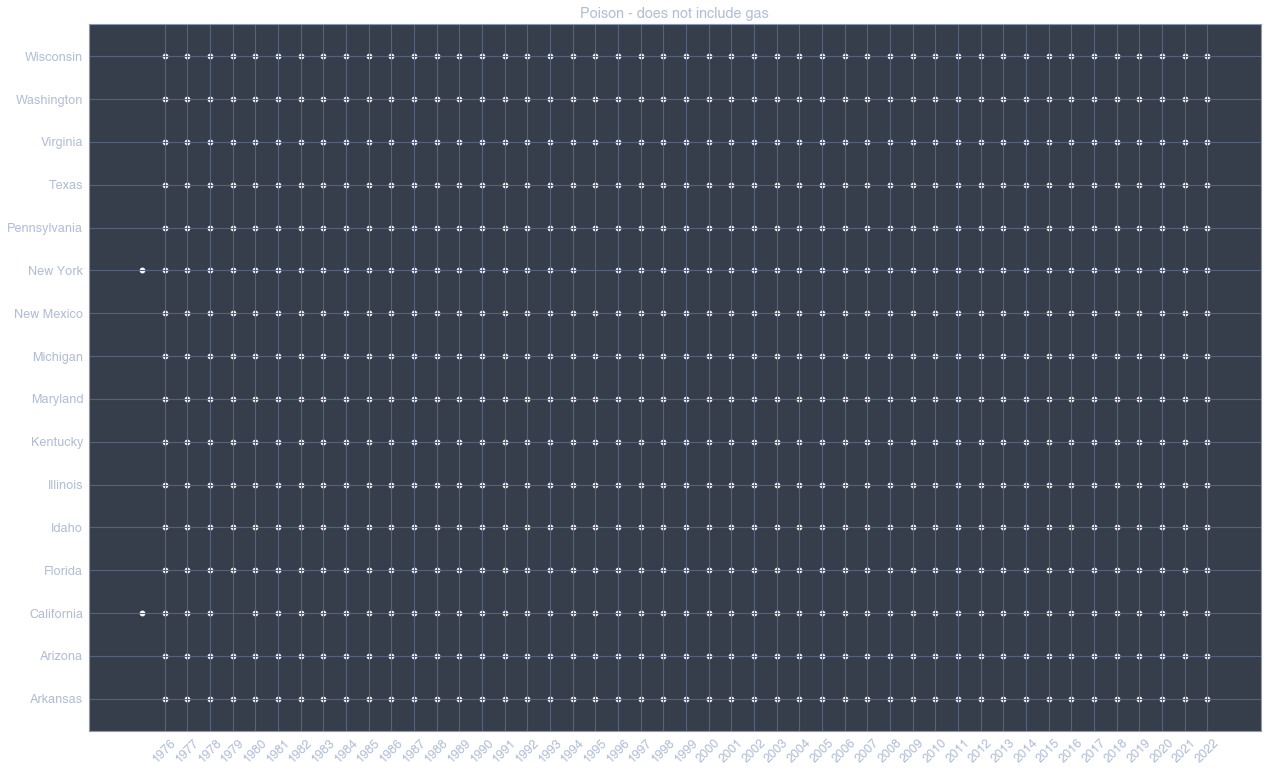

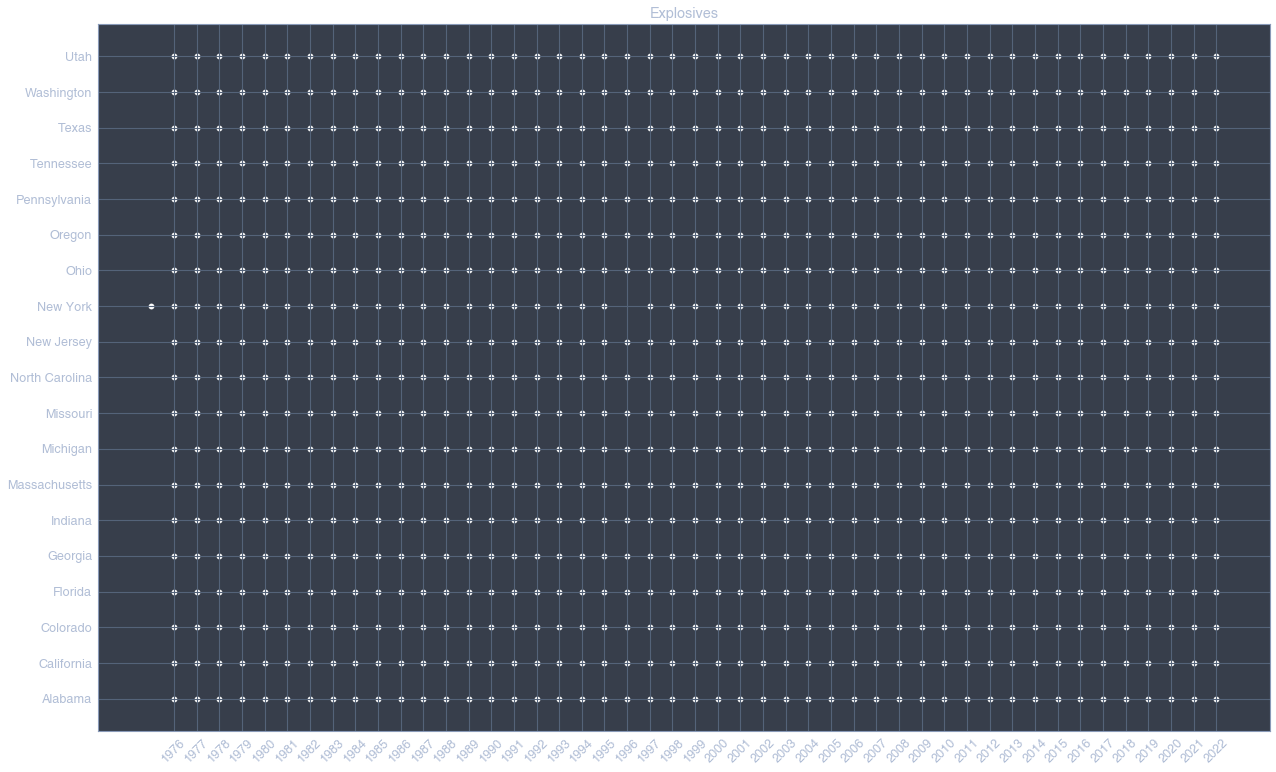

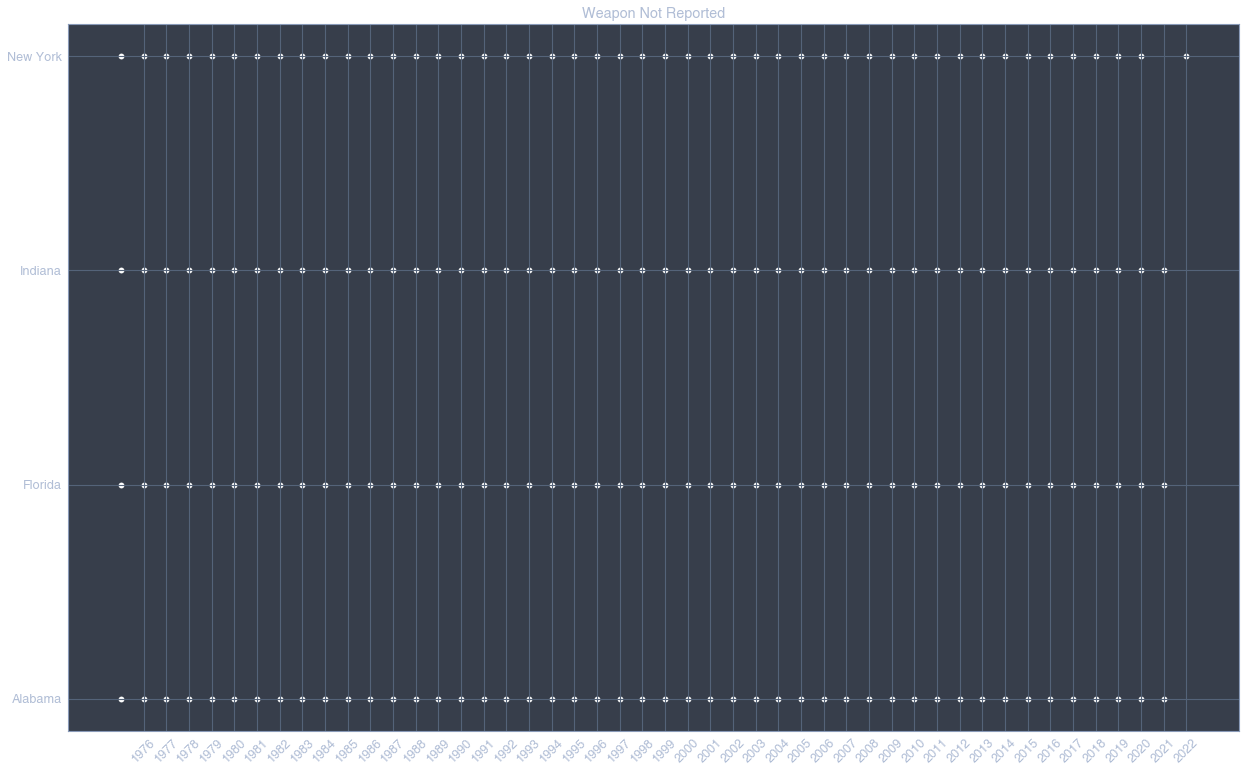

In [23]:
threshold = 0.35
x_labels = np.arange(1976, 2023)
    
for weapon in weapons_df.keys():
    weapon_df = weapons_df[weapon][weapons_df[weapon]<threshold]
    
    x = weapon_df.notnull().to_numpy().astype(int).T
    x = (x * np.tile(np.arange(1, weapon_df.index.shape[0]+1),
                     (weapon_df.columns.shape[0], 1))).flatten()
    y = np.repeat(np.arange(1, weapon_df.columns.shape[0]+1), 47)

    y = y[y!=0]
    x = x[y!=0]
    
    y_labels = list(weapon_df.columns)

#     print(f'{len(y_labels)}')

    plt.figure(figsize=(21,13))
    plt.scatter(x, y, color='w')
    plt.yticks(np.arange(1, len(y_labels)+1), y_labels)
    plt.xticks(np.arange(1, 48), x_labels, rotation=45)
    plt.title(weapon);
    